In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from functions import *

In [2]:
nltk.download('vader_lexicon')
sentiment_analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\Claudia
[nltk_data]     Naumova\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# loading the data
data_2020 = pd.read_json(r'..\data\fine_filtered2020_attrs.json.bz2', compression='bz2')
data_2020

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_qid,gender,nationality,date_of_birth,ethnic_group,occupation,party,academic_degree,domains
0,2020-02-13-100687,This diet focuses on lifelong changes to healt...,None,[],2020-02-13 18:22:19,1,"[[None, 0.8001], [Dr. Sebi, 0.1999]]",[https://parade.com/995529/christinperry/dr-se...,E,None,None,None,None,None,None,None,None,[parade.com]
1,2020-02-07-007719,"As an empowered female leader myself, I am thr...",None,[],2020-02-07 13:09:21,1,"[[None, 0.9507], [Maye Musk, 0.0493]]",[https://www.perishablenews.com/produce/celebr...,E,None,None,None,None,None,None,None,None,[perishablenews.com]
2,2020-01-21-098307,We stack the freshly plucked fruits into three...,Sahi Ram,[Q19605026],2020-01-21 12:49:00,1,"[[Sahi Ram, 0.9035], [None, 0.0965]]",[http://freshplaza.com/article/9181949/the-tin...,E,Q19605026,[male],[India],[+1959-10-10T00:00:00Z],None,[politician],[Aam Aadmi Party],None,[freshplaza.com]
3,2020-02-12-011869,Burger Burger will use local produce as much a...,None,[],2020-02-12 18:56:09,1,"[[None, 0.9078], [El Chapo, 0.0922]]",[https://www.belfastlive.co.uk/whats-on/food-d...,E,None,None,None,None,None,None,None,None,[belfastlive.co.uk]
4,2020-01-07-042453,It's likely that as we're seeing drier conditi...,None,[],2020-01-07 23:40:00,2,"[[None, 0.9688], [Scott Morrison, 0.0312]]",[http://msn.com/en-au/news/australia/kookaburr...,E,None,None,None,None,None,None,None,None,"[msn.com, msn.com]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4267,2020-02-20-028821,I suppose because of my size and what I do for...,None,[],2020-02-20 19:00:00,2,"[[None, 0.7036], [Anthony Mullally, 0.2063], [...",[https://www.stuff.co.nz/sport/league/11967886...,E,None,None,None,None,None,None,None,None,"[stuff.co.nz, nzcity.co.nz]"
4268,2020-01-23-046052,In the early 2000s the City of Cedar Rapids wa...,Jason Andrews,"[Q22704361, Q55523316]",2020-01-23 13:00:05,1,"[[Jason Andrews, 0.8019], [None, 0.1981]]",[https://adventure.howstuffworks.com/outdoor-a...,E,None,None,None,None,None,None,None,None,[howstuffworks.com]
4269,2020-03-26-047830,People have mostly stayed in the last couple o...,Arvind Kejriwal,[Q59155],2020-03-26 09:10:20,2,"[[Arvind Kejriwal, 0.6215], [None, 0.3786]]",[https://www.newindianexpress.com/cities/delhi...,E,Q59155,[male],[India],[+1968-08-16T00:00:00Z],None,"[politician, bureaucrat]",[Aam Aadmi Party],None,"[newindianexpress.com, newkerala.com]"
4270,2020-04-04-035826,We have been seeing reports of farmers dumping...,Narayana Gowda,[Q6965507],2020-04-04 00:38:36,1,"[[Narayana Gowda, 0.8262], [None, 0.1738]]",[http://www.bangaloremirror.com/bangalore/othe...,E,Q6965507,[male],[India],[+1966-06-10T00:00:00Z],None,"[politician, activist]",[Janata Dal (Secular)],None,[bangaloremirror.com]


In [4]:
# applying sentiment analysis
data_2020['sentiment'] = data_2020.apply(lambda row: get_sentiment(sentiment_analyzer, row.quotation), axis=1)
data_2020['sentiment']

0       positive
1       positive
2        neutral
3        neutral
4        neutral
          ...   
4267    positive
4268    positive
4269    positive
4270    negative
4271    positive
Name: sentiment, Length: 4272, dtype: object

In [5]:
# conversion of list values to strings
col_names = ['gender', 'nationality', 'ethnic_group', 'occupation', 'party', 'academic_degree', 'domains']
list_to_str(data_2020, col_names)
data_2020

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,speaker_qid,gender,nationality,date_of_birth,ethnic_group,occupation,party,academic_degree,domains,sentiment
0,2020-02-13-100687,This diet focuses on lifelong changes to healt...,None,[],2020-02-13 18:22:19,1,"[[None, 0.8001], [Dr. Sebi, 0.1999]]",[https://parade.com/995529/christinperry/dr-se...,E,None,None,None,None,None,None,None,None,parade.com,positive
1,2020-02-07-007719,"As an empowered female leader myself, I am thr...",None,[],2020-02-07 13:09:21,1,"[[None, 0.9507], [Maye Musk, 0.0493]]",[https://www.perishablenews.com/produce/celebr...,E,None,None,None,None,None,None,None,None,perishablenews.com,positive
2,2020-01-21-098307,We stack the freshly plucked fruits into three...,Sahi Ram,[Q19605026],2020-01-21 12:49:00,1,"[[Sahi Ram, 0.9035], [None, 0.0965]]",[http://freshplaza.com/article/9181949/the-tin...,E,Q19605026,male,India,[+1959-10-10T00:00:00Z],None,politician,Aam Aadmi Party,None,freshplaza.com,neutral
3,2020-02-12-011869,Burger Burger will use local produce as much a...,None,[],2020-02-12 18:56:09,1,"[[None, 0.9078], [El Chapo, 0.0922]]",[https://www.belfastlive.co.uk/whats-on/food-d...,E,None,None,None,None,None,None,None,None,belfastlive.co.uk,neutral
4,2020-01-07-042453,It's likely that as we're seeing drier conditi...,None,[],2020-01-07 23:40:00,2,"[[None, 0.9688], [Scott Morrison, 0.0312]]",[http://msn.com/en-au/news/australia/kookaburr...,E,None,None,None,None,None,None,None,None,msn.com,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4267,2020-02-20-028821,I suppose because of my size and what I do for...,None,[],2020-02-20 19:00:00,2,"[[None, 0.7036], [Anthony Mullally, 0.2063], [...",[https://www.stuff.co.nz/sport/league/11967886...,E,None,None,None,None,None,None,None,None,stuff.co.nz,positive
4268,2020-01-23-046052,In the early 2000s the City of Cedar Rapids wa...,Jason Andrews,"[Q22704361, Q55523316]",2020-01-23 13:00:05,1,"[[Jason Andrews, 0.8019], [None, 0.1981]]",[https://adventure.howstuffworks.com/outdoor-a...,E,None,None,None,None,None,None,None,None,howstuffworks.com,positive
4269,2020-03-26-047830,People have mostly stayed in the last couple o...,Arvind Kejriwal,[Q59155],2020-03-26 09:10:20,2,"[[Arvind Kejriwal, 0.6215], [None, 0.3786]]",[https://www.newindianexpress.com/cities/delhi...,E,Q59155,male,India,[+1968-08-16T00:00:00Z],None,politician,Aam Aadmi Party,None,newindianexpress.com,positive
4270,2020-04-04-035826,We have been seeing reports of farmers dumping...,Narayana Gowda,[Q6965507],2020-04-04 00:38:36,1,"[[Narayana Gowda, 0.8262], [None, 0.1738]]",[http://www.bangaloremirror.com/bangalore/othe...,E,Q6965507,male,India,[+1966-06-10T00:00:00Z],None,politician,Janata Dal (Secular),None,bangaloremirror.com,negative


In the following cells, I plotted the distribution of sentiments among male and female speakers, republicans and democrats, and speakers with Doctor and Bachelor academic degree in percentage.

In [6]:
# counting the number of male speakers
male_num = data_2020[data_2020['gender'] == 'male']['quoteID'].dropna().count()

# counting the percentage of positive, negative, and neutral reaction among male speakers
male_pos = (data_2020[(data_2020['gender'] == 'male') & (data_2020['sentiment'] == 'positive')]['quoteID'].dropna().count())/male_num*100
male_neg = (data_2020[(data_2020['gender'] == 'male') & (data_2020['sentiment'] == 'negative')]['quoteID'].dropna().count())/male_num*100
male_neut = (data_2020[(data_2020['gender'] == 'male') & (data_2020['sentiment'] == 'neutral')]['quoteID'].dropna().count())/male_num*100

In [7]:
# counting the number of female speakers
fem_num = data_2020[data_2020['gender'] == 'female']['quoteID'].dropna().count()

# counting the percentage of positive, negative, and neutral reaction among female speakers
fem_pos = (data_2020[(data_2020['gender'] == 'female') & (data_2020['sentiment'] == 'positive')]['quoteID'].dropna().count())/fem_num*100
fem_neg = (data_2020[(data_2020['gender'] == 'female') & (data_2020['sentiment'] == 'negative')]['quoteID'].dropna().count())/fem_num*100
fem_neut = (data_2020[(data_2020['gender'] == 'female') & (data_2020['sentiment'] == 'neutral')]['quoteID'].dropna().count())/fem_num*100

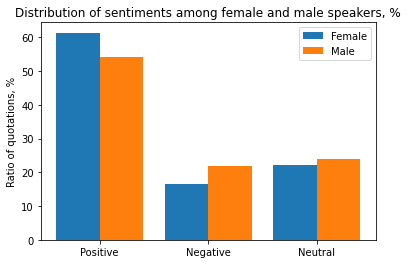

In [8]:
# plotting the distribution

sentiments = ['Positive','Negative','Neutral']
female = [fem_pos, fem_neg, fem_neut]
male = [male_pos, male_neg, male_neut]

x_axis = np.arange(len(sentiments))

plt.bar(x_axis -0.2, female, width=0.4, label = 'Female')
plt.bar(x_axis +0.2, male, width=0.4, label = 'Male')
plt.xticks(x_axis, sentiments)

plt.title('Distribution of sentiments among female and male speakers, %')
plt.ylabel('Ratio of quotations, %')

plt.legend()
plt.show()

# I was trying to build a function but failed (typical me)

# def sent_bar_dist (attr_s, k, labels, title):
#     sentiments = ['Positive','Negative','Neutral']
#     x_axis = np.arange(len(sentiments))
        
#     for attr, label, i in zip(attr_s, labels, k):
#         plt.bar(x_axis +k, attr, width=0.4, label = label)
#     plt.xticks(x_axis, sentiments)
#     plt.ylabel('Ratio of quotations, %')
#     plt.title(title)
#     plt.legend()
#     plt.show()

# female = [fem_pos, fem_neg, fem_neut]
# male = [male_pos, male_neg, male_neut]
# attr_s = [female, male]
# labels = ['Female', 'Male']
# k = [-0.2, +0.2]

# title = 'Distribution of sentiments among female and male speakers, %'
# sent_bar_dist(attr_s, k, labels, title)

In [9]:
# counting the number of republicans
rep_num = data_2020[data_2020['party'] == 'Republican Party']['quoteID'].dropna().count()

# counting the percentage of positive, negative, and neutral reaction among republicans
rep_pos = (data_2020[(data_2020['party'] == 'Republican Party') & (data_2020['sentiment'] == 'positive')]['quoteID'].dropna().count())/rep_num*100
rep_neg = (data_2020[(data_2020['party'] == 'Republican Party') & (data_2020['sentiment'] == 'negative')]['quoteID'].dropna().count())/rep_num*100
rep_neut = (data_2020[(data_2020['party'] == 'Republican Party') & (data_2020['sentiment'] == 'neutral')]['quoteID'].dropna().count())/rep_num*100

In [10]:
# counting the number of democrats
dem_num = data_2020[data_2020['party'] == 'Democratic Party']['quoteID'].dropna().count()

# counting the percentage of positive, negative, and neutral reaction among democrats
dem_pos = (data_2020[(data_2020['party'] == 'Democratic Party') & (data_2020['sentiment'] == 'positive')]['quoteID'].dropna().count())/dem_num*100
dem_neg = (data_2020[(data_2020['party'] == 'Democratic Party') & (data_2020['sentiment'] == 'negative')]['quoteID'].dropna().count())/dem_num*100
dem_neut = (data_2020[(data_2020['party'] == 'Democratic Party') & (data_2020['sentiment'] == 'neutral')]['quoteID'].dropna().count())/dem_num*100

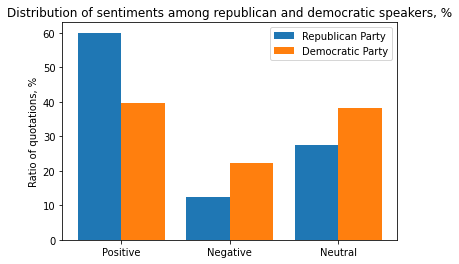

In [11]:
# plotting the distribution
sentiments = ['Positive','Negative','Neutral']
republican = [rep_pos, rep_neg, rep_neut]
democratic = [dem_pos, dem_neg, dem_neut]

x_axis = np.arange(len(sentiments))

plt.bar(x_axis -0.2, republican, width=0.4, label = 'Republican Party')
plt.bar(x_axis +0.2, democratic, width=0.4, label = 'Democratic Party')
plt.xticks(x_axis, sentiments)

plt.title('Distribution of sentiments among republican and democratic speakers, %')
plt.ylabel('Ratio of quotations, %')

plt.legend()
plt.show()

In [12]:
# counting the number of speakers with Doctor degree
doc_num = data_2020['academic_degree'].str.contains('Doctor').dropna().count()

# counting the percentage of positive, negative, and neutral reaction among speakers with Doctor degree
doc_pos = (data_2020[(data_2020['academic_degree'].str.contains('Doctor')) & (data_2020['sentiment'] == 'positive')]['quoteID'].dropna().count())/doc_num*100
doc_neg = (data_2020[(data_2020['academic_degree'].str.contains('Doctor')) & (data_2020['sentiment'] == 'negative')]['quoteID'].dropna().count())/doc_num*100
doc_neut = (data_2020[(data_2020['academic_degree'].str.contains('Doctor')) & (data_2020['sentiment'] == 'neutral')]['quoteID'].dropna().count())/doc_num*100

In [13]:
# counting the number of speakers with Bachelor degree
bac_num = data_2020['academic_degree'].str.contains('Bachelor').dropna().count()

# counting the percentage of positive, negative, and neutral reaction among speakers with Bachelor degree
bac_pos = (data_2020[(data_2020['academic_degree'].str.contains('Bachelor')) & (data_2020['sentiment'] == 'positive')]['quoteID'].dropna().count())/bac_num*100
bac_neg = (data_2020[(data_2020['academic_degree'].str.contains('Bachelor')) & (data_2020['sentiment'] == 'negative')]['quoteID'].dropna().count())/bac_num*100
bac_neut = (data_2020[(data_2020['academic_degree'].str.contains('Bachelor')) & (data_2020['sentiment'] == 'neutral')]['quoteID'].dropna().count())/bac_num*100

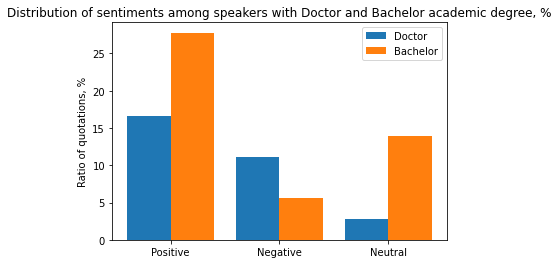

In [14]:
# plotting the distribution
sentiments = ['Positive','Negative','Neutral']
doctor = [doc_pos, doc_neg, doc_neut]
bachelor = [bac_pos, bac_neg, bac_neut]

x_axis = np.arange(len(sentiments))

plt.bar(x_axis -0.2, doctor, width=0.4, label = 'Doctor')
plt.bar(x_axis +0.2, bachelor, width=0.4, label = 'Bachelor')
plt.xticks(x_axis, sentiments)

plt.title('Distribution of sentiments among speakers with Doctor and Bachelor academic degree, %')
plt.ylabel('Ratio of quotations, %')

plt.legend()
plt.show()